# STAC

[SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/) is a specification that provides a common language to describe geospatial information so it can more easily be indexed and discovered.

DEA’s STAC metadata can be used to quickly identify all available data for a given product, location or time period. Using this metadata, the corresponding satellite product data can be efficiently downloaded from the cloud onto a local disk programmatically, or streamed directly into desktop GIS software like QGIS.

This tutorial is based on the [odc-stac](https://odc-stac.readthedocs.io/en/latest/) library, which simplifies using the STAC API with the ODC data model. For further information on how to use odc-stac, have a look at the [developer guide](https://odc-stac.readthedocs.io/en/latest/examples.html).

In [1]:
import pystac_client
import odc.stac

In [2]:
catalog = pystac_client.Client.open('https://explorer.sandbox.dea.ga.gov.au/stac')

In [3]:
# Set a bounding box
# [xmin, ymin, xmax, ymax] in latitude and longitude
bbox = [149.05, -35.32, 149.17, -35.25]

# Set a start and end date
start_date = "2021-12-10"
end_date = "2021-12-21"

# Set the STAC collections
collections = ["ga_ls8c_ard_3"]

In [4]:
# Build a query with the set parameters
query = catalog.search(
    bbox=bbox, collections=collections, datetime=f"{start_date}/{end_date}"
)

# Search the STAC catalog for all items matching the query
items = list(query.get_items())
print(f"Found: {len(items):d} datasets")

Found: 4 datasets


In [5]:
crs = "EPSG:32655"
resolution = 25

ds = odc.stac.load(
    items,
    bands=("nbart_red"),
    crs=crs,
    resolution=resolution,
    chunks={},
    groupby="solar_day",
    bbox=bbox,
)

In [6]:
# odc-stac library downloads DEA datasets stored in AWS
# when external to AWS (like outside DEA sandbox), AWS signed requests must be disabled
import os
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

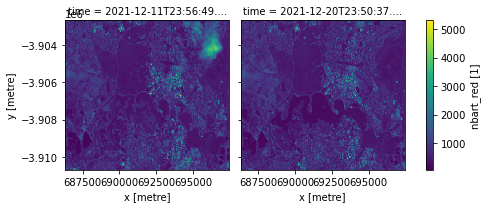

In [7]:
ds.nbart_red.plot(col='time');